In [1]:
#!pip install kaggle
import kaggle

In [2]:
#download dataset from kaggle
!kaggle datasets download orkhanpasha/retail-order-data -f orders.csv

Dataset URL: https://www.kaggle.com/datasets/orkhanpasha/retail-order-data
License(s): Apache 2.0
orders.csv.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
#extract file from zip file
import zipfile
zip_ref = zipfile.ZipFile('orders.csv.zip')
zip_ref.extractall() #extract file to dir
zip_ref.close() #close file

In [4]:
import pandas as pd
df = pd.read_csv('orders.csv', na_values = ['Not Available', 'unknown'])
df.head()

,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub Category,Product Id,cost price,List Price,Quantity,Discount Percent
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10,10,2,5
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,780,960,5,2
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,20,20,2,5


In [5]:
df.shape

(9994, 16)

In [6]:
#Renaming column names to make them lower case and use underscore as a delimiter instead of a space
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ', '_')
df.columns

Index(['order_id', 'order_date', 'ship_mode', 'segment', 'country', 'city',
       'state', 'postal_code', 'region', 'category', 'sub_category',
       'product_id', 'cost_price', 'list_price', 'quantity',
       'discount_percent'],
      dtype='object')

In [7]:
#Deriving new variables named discount,  sales price and profit from existing fields
df['discount'] = df['list_price'] * df['discount_percent']*0.01
df['sales_price'] = df['list_price'] - df['discount']
df['profit'] = df['sales_price'] - df['cost_price']

In [16]:
#convert order_type from object to date data type
df.info()
df.dtypes
df['order_date'] = pd.to_datetime(df['order_date'], format="%Y-%m-%d")
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   order_id      9994 non-null   int64         
 1   order_date    9994 non-null   datetime64[ns]
 2   ship_mode     9988 non-null   object        
 3   segment       9994 non-null   object        
 4   country       9994 non-null   object        
 5   city          9994 non-null   object        
 6   state         9994 non-null   object        
 7   postal_code   9994 non-null   int64         
 8   region        9994 non-null   object        
 9   category      9994 non-null   object        
 10  sub_category  9994 non-null   object        
 11  product_id    9994 non-null   object        
 12  quantity      9994 non-null   int64         
 13  discount      9994 non-null   float64       
 14  sales_price   9994 non-null   float64       
 15  profit        9994 non-null   float64 

order_id                 int64
order_date      datetime64[ns]
ship_mode               object
segment                 object
country                 object
city                    object
state                   object
postal_code              int64
region                  object
category                object
sub_category            object
product_id              object
quantity                 int64
discount               float64
sales_price            float64
profit                 float64
dtype: object

In [9]:
#Drop cost_price, list_price and discount_percent variables
df.drop(columns=['list_price','discount_percent','cost_price'],inplace=True)

In [18]:
#Exploratory Data Analysis
print(df.describe()) #Used describe to see basic statistical metrics of data such as mean, median, quartiles and standard deviation
print(df.isnull().sum()) #To see the number of missing values per each variable


          order_id                     order_date   postal_code     quantity  \
count  9994.000000                           9994   9994.000000  9994.000000   
mean   4997.500000  2022-12-29 10:20:34.820892672  55190.379428     3.789574   
min       1.000000            2022-01-01 00:00:00   1040.000000     1.000000   
25%    2499.250000            2022-06-29 00:00:00  23223.000000     2.000000   
50%    4997.500000            2022-12-28 00:00:00  56430.500000     3.000000   
75%    7495.750000            2023-07-03 00:00:00  90008.000000     5.000000   
max    9994.000000            2023-12-31 00:00:00  99301.000000    14.000000   
std    2885.163629                            NaN  32063.693350     2.225110   

          discount   sales_price       profit  
count  9994.000000   9994.000000  9994.000000  
mean      8.037953    221.718901    20.529188  
min       0.000000      0.000000    -5.000000  
25%       0.600000     19.200000    -0.400000  
50%       1.800000     49.000000     6.

In [19]:
df.dropna(subset=['ship_mode'], inplace=True) # Since the number of missing values is less than 3% I removed them.
print(df.isnull().sum()) #No missing values left

order_id        0
order_date      0
ship_mode       0
segment         0
country         0
city            0
state           0
postal_code     0
region          0
category        0
sub_category    0
product_id      0
quantity        0
discount        0
sales_price     0
profit          0
dtype: int64


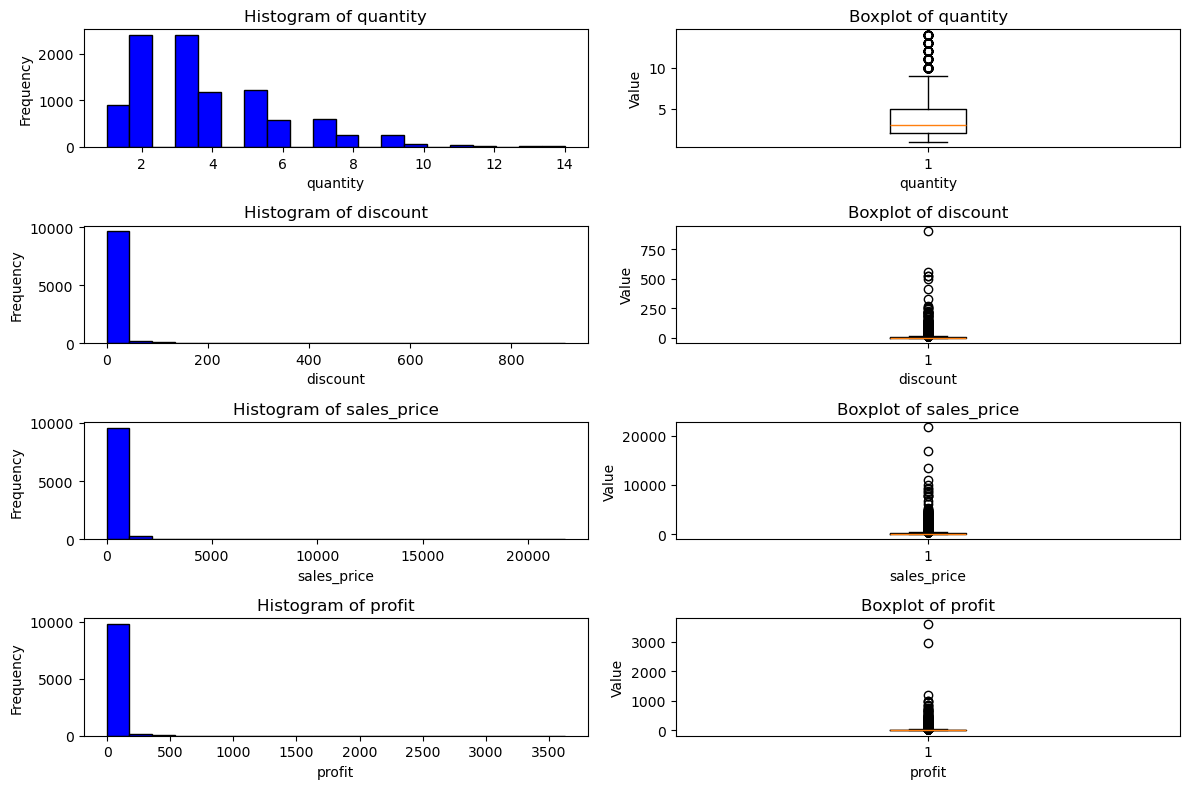

In [23]:
#Histogram for data distribution and boxplots for detecting outliers
import matplotlib.pyplot as plt

# Exclude specific columns from analysis
exclude_cols = ['order_id', 'postal_code']
continuous_vars = df.select_dtypes(include=['float64', 'int64']).columns
continuous_vars = [var for var in continuous_vars if var not in exclude_cols]

plt.figure(figsize=(12, 8))

for i, var in enumerate(continuous_vars, 1):
    plt.subplot(len(continuous_vars), 2, 2*i - 1)
    plt.hist(df[var], bins=20, color='blue', edgecolor='black')
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')

    plt.subplot(len(continuous_vars), 2, 2*i)
    plt.boxplot(df[var])
    plt.title(f'Boxplot of {var}')
    plt.xlabel(var)
    plt.ylabel('Value')

plt.tight_layout()
plt.show()


In [11]:
#Loading the data into SQL server using append method
import sqlalchemy as sal
engine = sal.create_engine('mssql://PASHA\SQLEXPRESS/master?driver=ODBC+DRIVER+17+FOR+SQL+SERVER')
conn=engine.connect()

In [13]:
#Load data
df.to_sql('df_orders', con=conn, index=False, if_exists = 'append')

38